In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
file_path = '/content/drive/MyDrive/Colab Notebooks/AI Projects/yeild_predictor/data/Rice_Mill_3-Month_Sample_Dataset.csv'
df = pd.read_csv(file_path)

In [5]:
df.head()

,Batch ID,Paddy Type,Source District,Season,Moisture (%),Input Weight (kg),Milling Duration (min),Rice Output (kg)
0,B001,Iluppai Poo Samba,Thiruvarur,Samba,13.8,1187,52,773
1,B002,CO 51,Tirunelveli,Navarai,14.5,826,60,534
2,B003,CR 1009 Sub 1,Tirunelveli,Samba,13.9,1147,36,780
3,B004,Karuppu Kavuni,Thiruvarur,Navarai,15.3,1110,59,712
4,B005,CR 1009 Sub 1,Tirunelveli,Kuruvai,15.1,1058,51,711


In [6]:
# 🧱 Step 1: Imports and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use the generated DataFrame directly (assume it's named `df`)
# If you already have df in memory, you can skip this step
# Otherwise, paste the dataset generation block here if needed

# 🧐 Quick Preview
print("🔍 Preview:")
display(df.head())

print("\n📦 Dataset Info:")
df.info()

print("\n❓ Missing Values:")
print(df.isnull().sum())

print("\n📊 Stats:")
display(df.describe())

print("\n🧩 Unique Categories:")
for col in ['Paddy Type', 'Source District', 'Season']:
    print(f"{col}: {df[col].unique()}")

🔍 Preview:


,Batch ID,Paddy Type,Source District,Season,Moisture (%),Input Weight (kg),Milling Duration (min),Rice Output (kg)
0,B001,Iluppai Poo Samba,Thiruvarur,Samba,13.8,1187,52,773
1,B002,CO 51,Tirunelveli,Navarai,14.5,826,60,534
2,B003,CR 1009 Sub 1,Tirunelveli,Samba,13.9,1147,36,780
3,B004,Karuppu Kavuni,Thiruvarur,Navarai,15.3,1110,59,712
4,B005,CR 1009 Sub 1,Tirunelveli,Kuruvai,15.1,1058,51,711



📦 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Batch ID                90 non-null     object 
 1   Paddy Type              90 non-null     object 
 2   Source District         90 non-null     object 
 3   Season                  90 non-null     object 
 4   Moisture (%)            90 non-null     float64
 5   Input Weight (kg)       90 non-null     int64  
 6   Milling Duration (min)  90 non-null     int64  
 7   Rice Output (kg)        90 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 5.8+ KB

❓ Missing Values:
Batch ID                  0
Paddy Type                0
Source District           0
Season                    0
Moisture (%)              0
Input Weight (kg)         0
Milling Duration (min)    0
Rice Output (kg)          0
dtype: int64

📊 Stats:


,Moisture (%),Input Weight (kg),Milling Duration (min),Rice Output (kg)
count,90.000000,90.00000,90.000000,90.000000
mean,14.273333,1023.40000,45.588889,669.744444
std,0.736496,108.17462,9.255298,72.304842
min,13.000000,804.00000,30.000000,520.000000
25%,13.700000,947.25000,37.250000,627.000000
50%,14.200000,1038.50000,46.000000,678.500000
75%,14.900000,1112.00000,53.000000,726.000000
max,15.500000,1191.00000,60.000000,789.000000



🧩 Unique Categories:
Paddy Type: ['Iluppai Poo Samba' 'CO 51' 'CR 1009 Sub 1' 'Karuppu Kavuni' 'ADT 43']
Source District: ['Thiruvarur' 'Tirunelveli']
Season: ['Samba' 'Navarai' 'Kuruvai']


# EDA

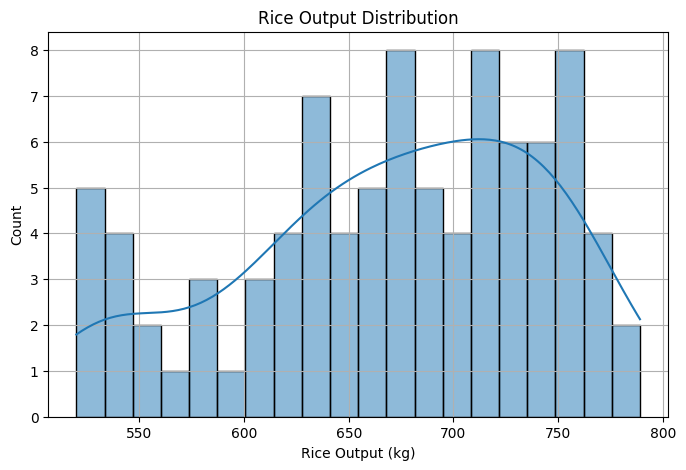

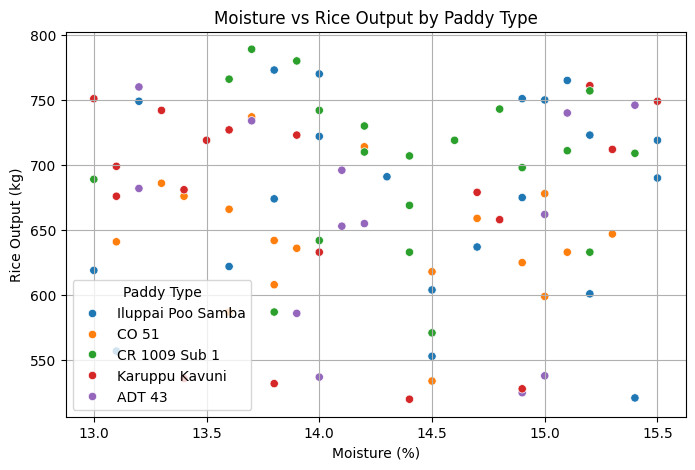

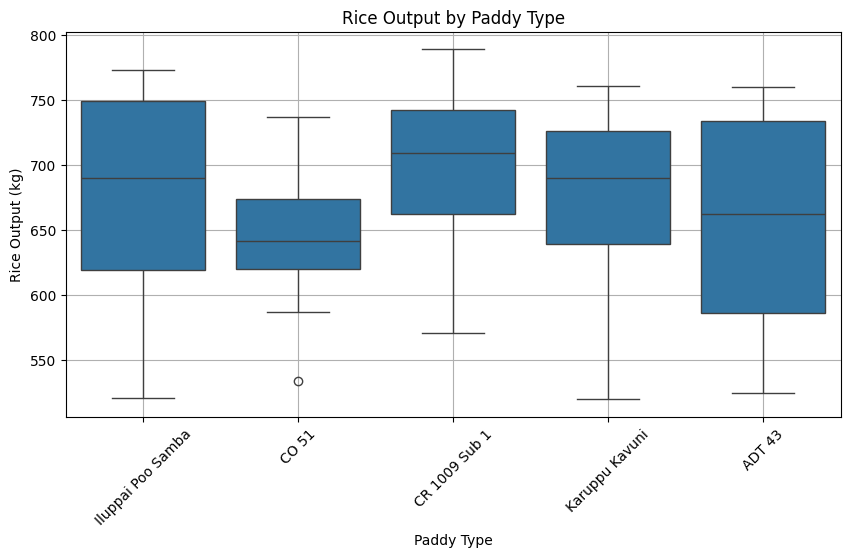

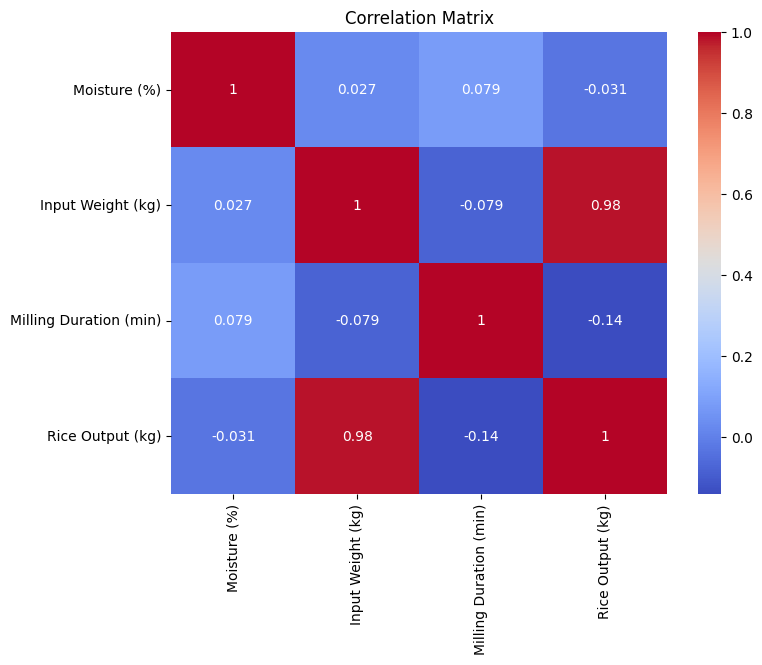

In [7]:
# 🎯 Step 2: EDA

# 1. Rice Output Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Rice Output (kg)'], bins=20, kde=True)
plt.title('Rice Output Distribution')
plt.xlabel('Rice Output (kg)')
plt.grid(True)
plt.show()

# 2. Moisture vs Output
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Moisture (%)', y='Rice Output (kg)', hue='Paddy Type', data=df)
plt.title('Moisture vs Rice Output by Paddy Type')
plt.grid(True)
plt.show()

# 3. Output by Paddy Type
plt.figure(figsize=(10, 5))
sns.boxplot(x='Paddy Type', y='Rice Output (kg)', data=df)
plt.title('Rice Output by Paddy Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 4. Heatmap for correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Preprocessing

In [8]:
# 🧹 Step 3: Preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Features and Target
X = df.drop(['Batch ID', 'Rice Output (kg)'], axis=1)
y = df['Rice Output (kg)']

# Define column types
numerical_cols = ['Moisture (%)', 'Input Weight (kg)', 'Milling Duration (min)']
categorical_cols = ['Paddy Type', 'Source District', 'Season']

# Create preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Train shape:", X_train.shape)
print("✅ Test shape:", X_test.shape)
print("📦 Preprocessing pipeline is ready to use.")

✅ Train shape: (72, 6)
✅ Test shape: (18, 6)
📦 Preprocessing pipeline is ready to use.


# Model Training & Evaluation

📈 Model Evaluation (Linear Regression):
MAE : 0.86 kg
RMSE: 1.42 kg
R² Score: 0.999


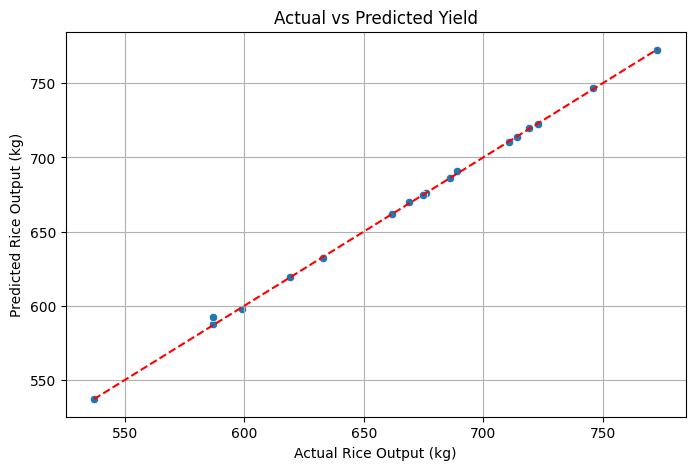

In [9]:
# 🤖 Step 4: Model Training & Evaluation

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

# Create full pipeline (preprocessing + model)
model_pipeline = make_pipeline(preprocessor, LinearRegression())

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict
y_pred = model_pipeline.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📈 Model Evaluation (Linear Regression):")
print(f"MAE : {mae:.2f} kg")
print(f"RMSE: {rmse:.2f} kg")
print(f"R² Score: {r2:.3f}")

# 🔍 Plot: Actual vs Predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Rice Output (kg)")
plt.ylabel("Predicted Rice Output (kg)")
plt.title("Actual vs Predicted Yield")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.grid(True)
plt.show()

# Compare Random Forest and XGBoost

In [10]:
# 🚀 Step 5: Compare Random Forest and XGBoost

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Define models
rf_model = make_pipeline(preprocessor, RandomForestRegressor(n_estimators=100, random_state=42))
xgb_model = make_pipeline(preprocessor, XGBRegressor(n_estimators=100, random_state=42))

# Train models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Evaluate
def evaluate_model(name, y_true, y_pred):
    print(f"\n📊 {name} Evaluation:")
    print(f"MAE : {mean_absolute_error(y_true, y_pred):.2f} kg")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f} kg")
    print(f"R²  : {r2_score(y_true, y_pred):.3f}")

evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("XGBoost", y_test, xgb_pred)


📊 Random Forest Evaluation:
MAE : 10.62 kg
RMSE: 14.30 kg
R²  : 0.944

📊 XGBoost Evaluation:
MAE : 11.14 kg
RMSE: 16.29 kg
R²  : 0.928


# Visualize the best model

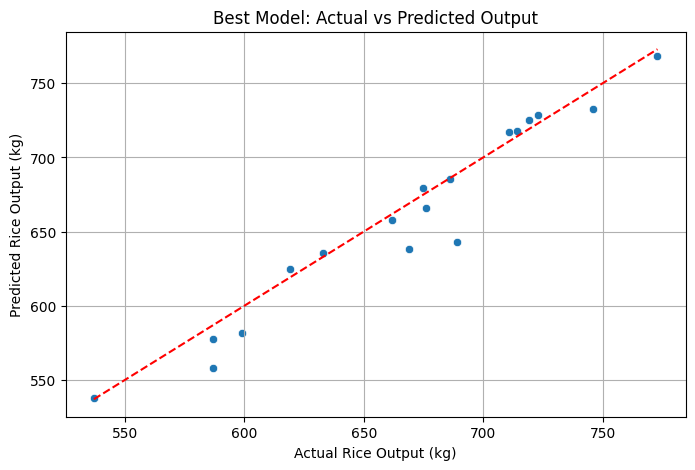

In [11]:
# 🔍 Plot best model (replace `y_pred` with rf_pred or xgb_pred accordingly)

best_pred = xgb_pred  # or rf_pred, depending on which is better

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=best_pred)
plt.xlabel("Actual Rice Output (kg)")
plt.ylabel("Predicted Rice Output (kg)")
plt.title("Best Model: Actual vs Predicted Output")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()

### Save the Best Model (Random Forest)

In [12]:
import joblib

# Save the model to disk
joblib.dump(rf_model, 'rice_yield_predictor_rf.pkl')

print("✅ Model saved as 'rice_yield_predictor_rf.pkl'")

✅ Model saved as 'rice_yield_predictor_rf.pkl'


In [13]:
import os
print("Current Directory:", os.getcwd())

Current Directory: /content


In [14]:
from google.colab import files
files.download('rice_yield_predictor_rf.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>